In [1]:
# 1. magic to print version
# 2. magic so that the notebook will reload external python modules
# https://gist.github.com/minrk/3301035
%load_ext watermark
%load_ext autoreload
%autoreload 
from typing import List
%watermark -a 'Jae H. Choi' -d -t -v -p typing

Jae H. Choi 2020-10-11 23:03:26 

CPython 3.8.3
IPython 7.16.1

typing unknown


# Frequentist Inference Case Study - Part A 

## 1. Learning objectives

Welcome to part A of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. Frequentist inference is the process of deriving conclusions about an underlying distribution via the observation of data. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

## Prerequisites

To be able to complete this notebook, you are expected to have a basic understanding of:
* what a random variable is (p.400 of Professor Spiegelhalter's *The Art of Statistics, hereinafter AoS*)
* what a population, and a population distribution, are (p. 397 of *AoS*)
* a high-level sense of what the normal distribution is (p. 394 of *AoS*)
* what the t-statistic is (p. 275 of *AoS*)

Happily, these should all be concepts with which you are reasonably familiar after having read ten chapters of Professor Spiegelhalter's book, *The Art of Statistics*.

We'll try to relate the concepts in this case study back to page numbers in *The Art of Statistics* so that you can focus on the Python aspects of this case study. The second part (part B) of this case study will involve another, more real-world application of these tools. 

For this notebook, we will use data sampled from a known normal distribution. This allows us to compare our results with theoretical expectations.

## 2. An introduction to sampling from the normal distribution

First, let's explore the ways we can generate the normal distribution. While there's a fair amount of interest in [sklearn](https://scikit-learn.org/stable/) within the machine learning community, you're likely to have heard of [scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/index.html) if you're coming from the sciences. For this assignment, you'll use [scipy.stats](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/stats.html) to complete your work. 

This assignment will require some digging around and getting your hands dirty (your learning is maximized that way)! You should have the research skills and the tenacity to do these tasks independently, but if you struggle, reach out to your immediate community and your mentor for help. 

In [64]:
from scipy.stats import norm, sem
from scipy.stats import t
from scipy import stats

import numpy as np
import pandas as pd
from numpy.random import seed
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")
%matplotlib inline

__Q1:__ Call up the documentation for the `norm` function imported above. (Hint: that documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)). What is the second listed method?

__A:__ <font color='red'>scipy.stats uses 4 methods: 1) norm_gen (MLE), 2) rv_continuous , 3) rv_generic, and 4) builtins.object. The 2nd method that generates random variables from the standard normal distribution based on PDF (Probability Density Function). </font>

In [2]:
help(norm)

Help on norm_gen in module scipy.stats._continuous_distns object:

class norm_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  norm_gen(momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  A normal continuous random variable.
 |  
 |  The location (``loc``) keyword specifies the mean.
 |  The scale (``scale``) keyword specifies the standard deviation.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `norm` is:
 |  
 |  .. math::
 |  
 |      f(x) = \frac{\exp(-x^2/2)}{\sqrt{2\pi}}
 |  
 |  for a real number :math:`x`.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      norm_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, data, **kwds)
 |      Return MLEs for shape (if applicable), location,

__Q2:__ Use the method that generates random variates to draw five samples from the standard normal distribution.

__A:__ <font color='red'> By using seed(47), those samples are reproducible; check the following code. </font>

In [3]:
seed=seed(47)
# draw five samples here
five_samples = norm.rvs(size=5, random_state=seed)
five_samples

array([-0.05437862, -0.03145022, -0.58245232, -0.66201309,  0.14694635])

__Q3:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution. If you want a reminder of the properties of this distribution, check out p. 85 of *AoS*. 

__A:__ <font color='red'> By using np.mean(), the mean of five samples was calculated. </font>

In [4]:
# Calculate and print the mean here, hint: use np.mean()
five_mean=np.mean(five_samples)
print(five_mean)

# Same by manual calculation.
print(sum(five_samples)/len(five_samples))  


-0.23666957978899453
-0.23666957978899453


__Q4:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$ (This is just the definition of **standard deviation** given by Professor Spiegelhalter on p.403 of *AoS*). Hint: np.sqrt() and np.sum() will be useful here and remember that numPy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

__A:__ <font color='red'> By using np.std(), the standard deviation was calculated. </font>

In [5]:
# Calculate and print the standard deviation here.
five_std=np.std(five_samples)
print(five_std)

# Same by manual calculation.
man_five_std=np.sqrt(sum([(value-five_mean)**2 for value in five_samples])/len(five_samples))
print(man_five_std)

0.3234158215261395
0.3234158215261395


Here we have calculated the actual standard deviation of a small data set (of size 5). But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die! 

In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$.

You can see Bessel's correction reflected in Professor Spiegelhalter's definition of **variance** on p. 405 of *AoS*.

__Q5:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

__A:__ <font color='red'> When the random variable is normally distributed, a minor correction exists to eliminate the bias. To derive the correction, note that for normally distributed X, Cochran's theorem implies that $\frac{(n-1)s^{2}}{\sigma ^{2}}$ has a chi square distribution with $n-1$ degrees of freedom and thus its square root, $\frac{\sqrt{n-1} s}{\sigma }$ has a chi distribution with $n-1$ degrees of freedom. 
$$E[s]=c_{4}(n)\sigma$$ 
Where the correction function $c_{4}(n)$ depends on number of samples.  
<img src="correction_factor.png" alt="Drawing" style="width: 200px;"/><br>
case1) data size $\leq$ 40 (or 30): $s \neq \sigma$ <br>
case2) data size $>$ 40 (or 30): $s \approx \sigma$ </font>

In [6]:
# Calculate and print the standard deviation here.
five_std_bassel=np.std(five_samples, ddof=1)
print(five_std_bassel)

# Same by manual calculation.
man_five_std_bassel=np.sqrt(sum([(value-five_mean)**2 for value in five_samples])/(len(five_samples)-1))
print(man_five_std_bassel)

0.36158988096569383
0.36158988096569383


__Q6:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

__A:__ <font color='red'>values from np.std() and manual calculation match. </font>

In [7]:
assert five_std== man_five_std

__Q7:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

__A:__ <font color='red'> values from np.std(, ddof=1) and manual calculation match. </font>

In [8]:
assert five_std_bassel==man_five_std_bassel

### Summary of section

In this section, you've been introduced to the scipy.stats package and used it to draw a small sample from the standard normal distribution. You've calculated the average (the mean) of this sample and seen that this is not exactly equal to the expected population parameter (which we know because we're generating the random variates from a specific, known distribution). You've been introduced to two ways of calculating the standard deviation; one uses $n$ in the denominator and the other uses $n-1$ (Bessel's correction). You've also seen which of these calculations np.std() performs by default and how to get it to generate the other.

You use $n$ as the denominator if you want to calculate the standard deviation of a sequence of numbers. You use $n-1$ if you are using this sequence of numbers to estimate the population parameter. This brings us to some terminology that can be a little confusing.

The population parameter is traditionally written as $\sigma$ and the sample statistic as $s$. Rather unhelpfully, $s$ is also called the sample standard deviation (using $n-1$) whereas the standard deviation of the sample uses $n$. That's right, we have the sample standard deviation and the standard deviation of the sample and they're not the same thing!

The sample standard deviation
\begin{equation}
s = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}} \approx \sigma,
\end{equation}
is our best (unbiased) estimate of the population parameter ($\sigma$).

If your dataset _is_ your entire population, you simply want to calculate the population parameter, $\sigma$, via
\begin{equation}
\sigma = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}
\end{equation}
as you have complete, full knowledge of your population. In other words, your sample _is_ your population. It's worth noting that we're dealing with what Professor Spiegehalter describes on p. 92 of *AoS* as a **metaphorical population**: we have all the data, and we act as if the data-point is taken from a population at random. We can think of this population as an imaginary space of possibilities. 

If, however, you have sampled _from_ your population, you only have partial knowledge of the state of your population. In this case, the standard deviation of your sample is not an unbiased estimate of the standard deviation of the population, in which case you seek to estimate that population parameter via the sample standard deviation, which uses the $n-1$ denominator.

Great work so far! Now let's dive deeper.

## 3. Sampling distributions

So far we've been dealing with the concept of taking a sample from a population to infer the population parameters. One statistic we calculated for a sample was the mean. As our samples will be expected to vary from one draw to another, so will our sample statistics. If we were to perform repeat draws of size $n$ and calculate the mean of each, we would expect to obtain a distribution of values. This is the sampling distribution of the mean. **The Central Limit Theorem (CLT)** tells us that such a distribution will approach a normal distribution as $n$ increases (the intuitions behind the CLT are covered in full on p. 236 of *AoS*). For the sampling distribution of the mean, the standard deviation of this distribution is given by

\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the mean and $\sigma$ is the standard deviation of the population (the population parameter).

This is important because typically we are dealing with samples from populations and all we know about the population is what we see in the sample. From this sample, we want to make inferences about the population. We may do this, for example, by looking at the histogram of the values and by calculating the mean and standard deviation (as estimates of the population parameters), and so we are intrinsically interested in how these quantities vary across samples. 

In other words, now that we've taken one sample of size $n$ and made some claims about the general population, what if we were to take another sample of size $n$? Would we get the same result? Would we make the same claims about the general population? This brings us to a fundamental question: _when we make some inference about a population based on our sample, how confident can we be that we've got it 'right'?_

We need to think about **estimates and confidence intervals**: those concepts covered in Chapter 7, p. 189, of *AoS*.

Now, the standard normal distribution (with its variance equal to its standard deviation of one) would not be a great illustration of a key point. Instead, let's imagine we live in a town of 50,000 people and we know the height of everyone in this town. We will have 50,000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [44]:

pop_heights = norm.rvs(172, 5, size=50000)

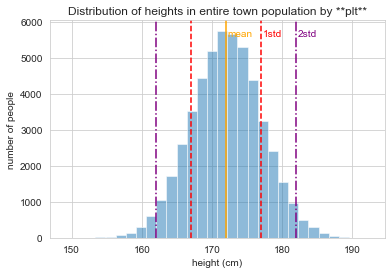

In [45]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
ax.hist(pop_heights, bins=30, alpha = 0.5) #df['value'].plot(color='#334f8d', figsize=(6,4), fontsize=11, zorder=2)
ax.set_xlabel('height (cm)') 
ax.set_ylabel('number of people')
# _ = plt.xlabel('height (cm)')
# _ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population by **plt**')
_ = plt.axvline(172, color='orange')
ax.text(x=172+0.2,y=5610, s='mean', alpha=1.0, color='orange')
_ = plt.axvline(172+5, color='r', linestyle='--')
ax.text(x=172+5.2,y=5610, s='1std', alpha=1.0, color='r')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='purple', linestyle='-.')
ax.text(x=172+10.2,y=5610, s='2std', alpha=1.0, color='purple')
_ = plt.axvline(172-10, color='purple', linestyle='-.')
plt.show()

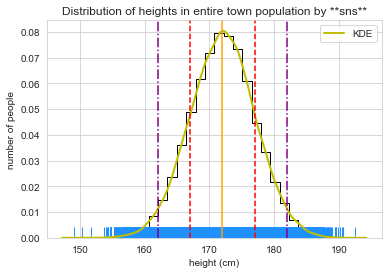

In [46]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
ax = sns.distplot(pop_heights, bins=30, rug=True, 
             rug_kws={"color": "dodgerblue"},
             kde_kws={"color": "y", "lw": 2, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1, "color": "k"})
ax.set_xlabel('height (cm)')
ax.set_ylabel('number of people')
plt.title('Distribution of heights in entire town population by **sns**')
plt.axvline(172, color='orange')
plt.axvline(172+5, color='r', linestyle='--')
plt.axvline(172-5, color='r', linestyle='--')
plt.axvline(172+10, color='purple', linestyle='-.')
plt.axvline(172-10, color='purple', linestyle='-.')
plt.show()

Now, 50,000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [71]:
def townsfolk_sampler(n):
    
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [99]:
np.random.seed=47
daily_sample1 = townsfolk_sampler(10)
x_bar_sam1=np.mean(daily_sample1)
print(x_bar_sam1)

170.0930138899443


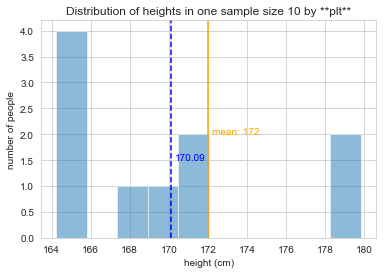

In [100]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
_ = plt.hist(daily_sample1, bins=10, alpha=0.5)
ax.set_xlabel('height (cm)')
ax.set_ylabel('number of people')
_ = plt.axvline(172, color='orange')
ax.text(x=172+0.2,y=2, s='mean: 172', alpha=1.0, color='orange')
_ = plt.axvline(x_bar_sam1, linestyle='--', color='blue')
string=str(round(x_bar_sam1,2))
ax.text(x=x_bar_sam1+0.2,y=1.5, s=string, alpha=1.0, color='blue')
_ = plt.title('Distribution of heights in one sample size 10 by **plt**')
plt.show()

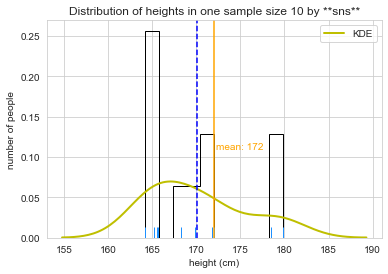

In [101]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
ax=sns.distplot(daily_sample1, bins=10, rug=True, 
             rug_kws={"color": "dodgerblue"},
             kde_kws={"color": "y", "lw": 2, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1, "color": "k"})
plt.xlabel('height (cm)')
plt.ylabel('number of people')
plt.title('Distribution of heights in one sample size 10 by **sns**')
plt.axvline(x_bar_sam1, linestyle='--', color='blue')
plt.axvline(172, color='orange')
ax.text(x=172+0.2,y=0.11, s='mean: 172', alpha=1.0, color='orange')
plt.show()

The sample distribution doesn't resemble what we take the population distribution to be. What do we get for the mean?

In [113]:
np.random.seed=47
np.mean(daily_sample1)

170.0930138899443

And if we went out and repeated this experiment?

In [114]:
np.random.seed=47
daily_sample2 = townsfolk_sampler(10)

In [115]:
np.mean(daily_sample2)

168.63399144132666

__Q8:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

__A:__ <font color='red'> As number of samples $n$ increases, the following distirbution shows CLT such that it tends to be normal distribution.</font>

sample mean: 171.87


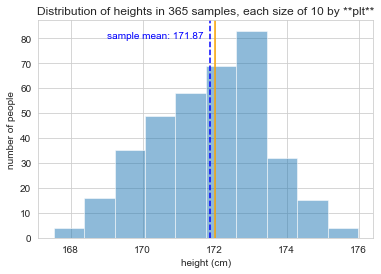

In [292]:
seed(47)
# plot in matplotlib
fig, ax = plt.subplots(1,1, figsize = (6,4))
daily_10_dist = [np.mean(townsfolk_sampler(10)) for i in range(365)]
ax.hist(daily_10_dist,bins=10, alpha=0.5)

plt.xlabel('height (cm)')
plt.ylabel('number of people')
plt.title('Distribution of heights in 365 samples, each size of 10 by **plt**')
x_bar=np.mean(daily_10_dist)
print(f'sample mean: {x_bar:.2f}')
plt.axvline(x_bar, linestyle='--', color='blue')
ax.text(x=172-3,y=80, s='sample mean: 171.87', alpha=1.0, color='blue')

plt.axvline(172, color='orange')
plt.show()

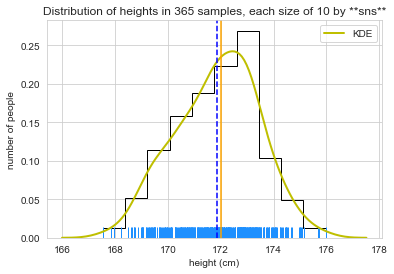

In [165]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
sns.distplot(daily_10_dist, bins=10, rug=True, 
             rug_kws={"color": "dodgerblue"},
             kde_kws={"color": "y", "lw": 2, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1, "color": "k"})
plt.xlabel('height (cm)')
plt.ylabel('number of people')
plt.title('Distribution of heights in 365 samples, each size of 10 by **sns**')
plt.axvline(x_bar, linestyle='--', color='blue')
plt.axvline(172, color='orange')
plt.show()

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

__Q9:__ Verify the above results from the CLT.

__A:__ <font color='red'> As number of samples $n$ increases, the above distirbution shows sample mean (365 samples) $\overline{x}_{size=10, n=365}=$**171.87** which is much closer to the population mean $\sigma=172$ than sample mean (1 sample) $\overline{x}_{size=10,n=1}=$173.7. This shows CLT works.</font>

In [156]:
x_bar=np.mean(daily_10_dist)
print(f'The sample mean x_bar (size=10 for 365 samples) {x_bar:.2f} is close to the population mean mu {172}.')

The sample mean x_bar (size=10 for 365 samples) 171.87 is close to the population mean mu 172.


Remember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.

__Q10:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year)! Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

__A:__ <font color='red'> Once size increases, CLT works as well. $\overline{x}_{size=50, n=365}=$**171.94** which is closer to the population mean $\sigma=172$ than sample mean (1 sample) $\overline{x}_{size=10,n=365}=$171.87. This shows CLT works.</font>

In [1]:
seed(47)
# plot in matplotlib
fig, ax = plt.subplots(1,1, figsize = (6,4))
daily_50_dist = [np.mean(townsfolk_sampler(50)) for i in range(365)]
ax.hist(daily_50_dist,bins=50, alpha=0.5)

plt.xlabel('height (cm)')
plt.ylabel('number of people')
plt.title('Distribution of heights in 365 samples, each size of 10 by **plt**')
x_bar=np.mean(daily_50_dist)
print(f'sample mean: {x_bar:.2f}')
plt.axvline(x_bar, linestyle='--', color='blue')
ax.text(x=172-3,y=80, s='sample mean: 171.87', alpha=1.0, color='blue')

plt.axvline(172, color='orange')
plt.show()

NameError: name 'seed' is not defined

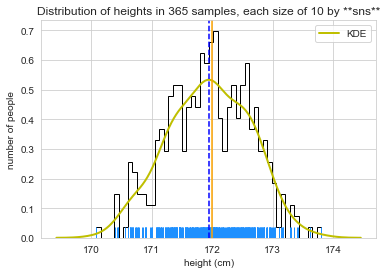

In [204]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
ax=sns.distplot(daily_50_dist, bins=50, rug=True, 
             rug_kws={"color": "dodgerblue"},
             kde_kws={"color": "y", "lw": 2, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1, "color": "k"})
plt.xlabel('height (cm)')
plt.ylabel('number of people')
plt.title('Distribution of heights in 365 samples, each size of 10 by **sns**')
plt.axvline(x_bar_50, linestyle='--', color='blue')
plt.axvline(172, color='orange')
plt.show()

What we've seen so far, then, is that we can estimate population parameters from a sample from the population, and that samples have their own distributions. Furthermore, the larger the sample size, the narrower are those sampling distributions.

### Normally testing time!

All of the above is well and good. We've been sampling from a population we know is normally distributed, we've come to understand when to use $n$ and when to use $n-1$ in the denominator to calculate the spread of a distribution, and we've  seen the Central Limit Theorem in action for a sampling distribution. All seems very well behaved in Frequentist land. But, well, why should we really care?

Remember, we rarely (if ever) actually know our population parameters but we still have to estimate them somehow. If we want to make inferences to conclusions like "this observation is unusual" or "my population mean has changed" then we need to have some idea of what the underlying distribution is so we can calculate relevant probabilities. In frequentist inference, we use the formulae above to deduce these population parameters. Take a moment in the next part of this assignment to refresh your understanding of how these probabilities work.

Recall some basic properties of the standard normal distribution, such as that about 68% of observations are within $\pm$ 1 standard deviation of the mean. Check out the precise definition of a normal distribution on p. 394 of *AoS*. 

__Q11:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

__A:__ <font color='red'> 
Each tail area (the probability that outside of $\pm$ 1 std) is $\frac{1 - 0.68}{2}=0.17$. So the probability of observing the value 1 or less is 0.84 (i.e. $P(x\leq 1)=0.84$).
</font>

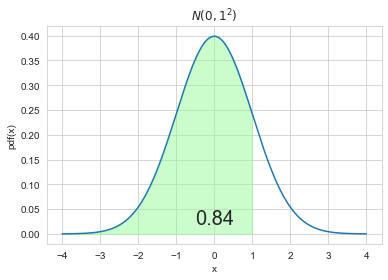

In [207]:
seed(47)
lessthan1=norm.cdf(x=1, loc=0, scale=1)
# plot
fig, ax = plt.subplots(1,1, figsize = (6,4))
# for distribution curve
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x,loc=0,scale=1))
ax.set_title("$N(0,1^2)$")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
# for fill_between
px=np.arange(-4,1,0.01)
ax.fill_between(px,norm.pdf(px,loc=0,scale=1),alpha=0.5, color='palegreen')
# for text
ax.text(-0.5,0.02, round(lessthan1,2), fontsize=20)
plt.show()

In [208]:
print("By manual:")
print(f'  {1 - (1 - 0.68) / 2}') 

By manual:
  0.8400000000000001


Calculating this probability involved calculating the area under the curve from the value of 1 and below. To put it in mathematical terms, we need to *integrate* the probability density function. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above). One way to do this is to look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

pdf function is:
$$f(x; \mu, \sigma^2) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
probability is:
$$P(a \leq X \leq b)=\int_{a}^{b} f(x; \mu, \sigma^2) dx $$

__Q12:__ Use the cdf() function to answer the question above again and verify you get the same answer.

__A:__ <font color='red'> 
The manual area calculation under PDF (0.84) is approximately the same as the area calculation by `scipy.stats.cdf()` function (0.841)(i.e. $P(x\leq 1)=0.84$).
</font>

In [210]:
print("By using cdf():")
print(f'  {lessthan1}')

By using cdf():
  0.8413447460685429


__Q13:__ Using our knowledge of the population parameters for our townsfolks' heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

__A:__ <font color='red'> 
When we randomly choose one person from population ($N(x=177; \mu=172, \sigma=5$)) to be 177 cm or less, it is $P(X \leq 177)=P(Z \leq \frac{177-172}{5})$=**0.84**: 84% 
</font>

In [234]:
print("By z score:")
# x=177, mean=172, std=5 (cm)
z=(177-172)/5
lessthanZ=norm.cdf(x=z, loc=0, scale=1)
print(f'  {lessthanZ}')

print("By using cdf():")
# x=177, mean=172, std=5 (cm)
lessthan177=norm.cdf(x=177, loc=172, scale=5)
print(f'  {lessthan177}')

By z score:
  0.8413447460685429
By using cdf():
  0.8413447460685429


__Q14:__ Turning this question around — suppose we randomly pick one person and measure their height and find they are 2.00 m tall. How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability. 

__A:__ <font color='red'> 
When we randomly choose one person from population ($N(x=200; \mu=172, \sigma=5)$) to be 200 cm, it is $P(X = 200)$, which cannot be found by using PDF. So approximately we can find the area under the PDF between 200 and 201; probability that a person who is greater than 2 m tall but less than 201 cm can be selected from random pick. $P(200 \leq X \leq 201)=P(\frac{200-172}{5} \leq Z \leq \frac{201-172}{5})$=**7.40*10^(-9)**: 0.00000074% 
</font>

In [235]:
print("By z score:")
# x=200, mean=172, std=5 (cm)
z1=(200-172)/5
z2=(201-172)/5
betweenZ=norm.cdf(x=z2, loc=0, scale=1)-norm.cdf(x=z1, loc=0, scale=1)
print(f'  {betweenZ}')

print("By using cdf():")
# x=200, mean=172, std=5 (cm)
between200=norm.cdf(x=201, loc=172, scale=5)-norm.cdf(x=200, loc=172, scale=5)
print(f'  {between200}')

By z score:
  7.401844248633438e-09
By using cdf():
  7.401844248633438e-09


What we've just done is calculate the ***p-value*** of the observation of someone 2.00m tall (review *p*-values if you need to on p. 399 of *AoS*). We could calculate this probability by virtue of knowing the population parameters. We were then able to use the known properties of the relevant normal distribution to calculate the probability of observing a value at least as extreme as our test value.

We're about to come to a pinch, though. We've said a couple of times that we rarely, if ever, know the true population parameters; we have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation. 

This is very true and usually we have sample sizes larger than one. This means we can calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation. 

In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain. 

Above, we highlighted one result from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that _even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size_. (**Check out p. 199 of AoS if you need to revise this**). This is the key driver for us 'requiring' a certain sample size, for example you may frequently see a minimum sample size of 30 stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.

__Q15:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use the random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf()) Recall that the ***margin of error*** is mentioned on p. 189 of the *AoS* and discussed in depth in that chapter). 
* Calculate the 95% Confidence Interval of the mean (***confidence intervals*** are defined on p. 385 of *AoS*) 
* Does this interval include the true population mean?

__A:__ <font color='red'> 
For sample distribution: $N(\mu=172, \sigma=5)$),\
$\overline{x}_{size=50}=172.78$ (cm)\
$s_{size=50}=4.20$ (cm)\
$\text{95% margin of error}_{size=50}=1.16$ (cm)\
$\text{95% Confidence Interval of the mean}=172.78 \pm 1.16$\
Yes; $\sigma=172$ (yellow line in graph) is within the confidence intervals. (Look at the graph below)
</font>

In [238]:
seed(47)
# take your sample now
sample_size = 50
sample_50 = townsfolk_sampler(sample_size)

In [243]:
mean_50=np.mean(sample_50)
print(f'mean of sample size=50: {mean_50:.2f} (cm)')

mean of sample size=50 (cm): 172.78


In [244]:
std_50=np.std(sample_50, ddof=1)
print(f'std of sample size=50: {std_50:.2f} (cm)')

std of sample size=50: 4.20 (cm)


In [270]:
# margin of error = critical z-value * standard error (std/sqrt(n)) of the statistic
standard_error=std_50/np.sqrt(sample_size)

# for two-tailed test: 2.5% will be on either side of the rejection area 
# method1: critical z-value
z_score_95=1.96
margin_error_95=z_score_95*standard_error
print("Method1")
print(f'95% margin of error for sample size=50: {margin_error_95:.2f} (cm)')

# method2: use ppf() if Standard Normal Distribution, norm.ppf(0.95, loc=0, scale=1)
# get ppf(0.975) because it is 2.5% for both-tailed test.  
z_score_95_ppf=norm.ppf(0.975, loc=0, scale=1)
margin_error_95_ppf=z_score_95_ppf*standard_error
print("Method2")
print(f'95% margin of error for sample size=50: {margin_error_95_ppf:.2f} (cm)')

# sanity check: (with builtin 'sem' function)
assert (standard_error == sem(sample_50))


Method1
95% margin of error for sample size=50: 1.16 (cm)
Method2
95% margin of error for sample size=50: 1.16 (cm)


In [274]:
lower_95 = mean_50 - margin_error_95_ppf
upper_95 = mean_50 + margin_error_95_ppf
print(f'{lower_95:.2f}, {mean_50:.2f}, {upper_95:.2f}')

171.62, 172.78, 173.94


sample mean: 172.78


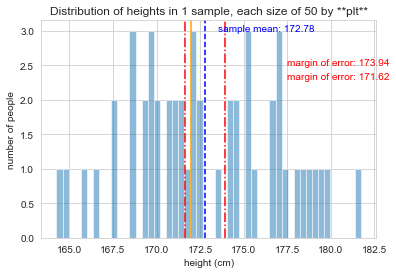

In [295]:

# calculate daily means from the larger sample size here
# plot in matplotlib
fig, ax = plt.subplots(1,1, figsize = (6,4))
ax.hist(sample_50, bins=50, alpha=0.5)

plt.xlabel('height (cm)')
plt.ylabel('number of people')
plt.title('Distribution of heights in 1 sample, each size of 50 by **plt**')
print(f'sample mean: {mean_50:.2f}')
plt.axvline(mean_50, linestyle='--', color='blue')
ax.text(x=172+1.5,y=3, s='sample mean: 172.78', alpha=1.0, color='blue')
plt.axvline(172, color='orange')

plt.axvline(lower_95, color='r', linestyle='-.')
plt.axvline(upper_95, color='r', linestyle='-.')
ax.text(x=172+5.5,y=2.5, s='margin of error: 173.94', alpha=1.0, color='r')
ax.text(x=172+5.5,y=2.3, s='margin of error: 171.62', alpha=1.0, color='r')
plt.show()

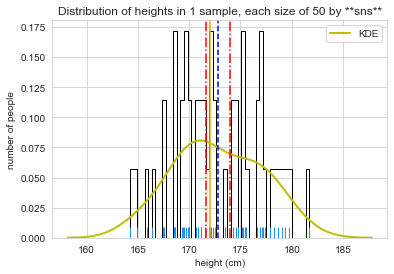

In [297]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
ax=sns.distplot(sample_50, bins=50, rug=True, 
             rug_kws={"color": "dodgerblue"},
             kde_kws={"color": "y", "lw": 2, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1, "color": "k"})
plt.xlabel('height (cm)')
plt.ylabel('number of people')
plt.title('Distribution of heights in 1 sample, each size of 50 by **sns**')
plt.axvline(mean_50, linestyle='--', color='blue')
plt.axvline(172, color='orange')
plt.axvline(lower_95, color='r', linestyle='-.')
plt.axvline(upper_95, color='r', linestyle='-.')
plt.show()

__Q16:__ Above, we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

__A:__ <font color='red'> 
We cheated using z-score with $\sigma$ because we don't know any parameter of true population statistics. We should've used a t-score instead of a z-score cause we don't know the population standard deviation $\sigma$.

Check the [reference](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) if you are interested in it.
</font>

__Q17:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

__A:__ <font color='red'> 
Wider. This is because t-distribution curves are wider and fatter at the tails compared to normal distribution curves; that means t-distribution has greater ctirical t-value $\rightarrow$ greater margin of error. That is, via t-distribution, more uncertainty comes for estimating population parameters from a sample.
</font>

In [301]:
t_critical = t.ppf(0.975, sample_size-1)
print(f'Use critical-t value: {t_critical:.2f} instead of critical z-value')

Use critical-t value: 2.01 instead of critical z-value


In [302]:
margin_of_error_95_t = t_critical * standard_error
lower_95_t = mean_50 - margin_of_error_95_t
upper_95_t = mean_50 + margin_of_error_95_t
print(f'{lower_95_t:.2f}, {mean_50:.2f}, {upper_95_t:.2f}')

171.59, 172.78, 173.97


sample mean: 172.78


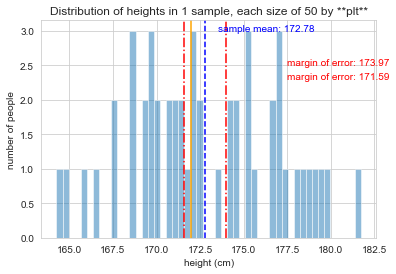

In [303]:
# calculate daily means from the larger sample size here
# plot in matplotlib
fig, ax = plt.subplots(1,1, figsize = (6,4))
ax.hist(sample_50, bins=50, alpha=0.5)

plt.xlabel('height (cm)')
plt.ylabel('number of people')
plt.title('Distribution of heights in 1 sample, each size of 50 by **plt**')
print(f'sample mean: {mean_50:.2f}')
plt.axvline(mean_50, linestyle='--', color='blue')
ax.text(x=172+1.5,y=3, s='sample mean: 172.78', alpha=1.0, color='blue')
plt.axvline(172, color='orange')

plt.axvline(lower_95_t, color='r', linestyle='-.')
plt.axvline(upper_95_t, color='r', linestyle='-.')
ax.text(x=172+5.5,y=2.5, s='margin of error: 173.97', alpha=1.0, color='r')
ax.text(x=172+5.5,y=2.3, s='margin of error: 171.59', alpha=1.0, color='r')
plt.show()

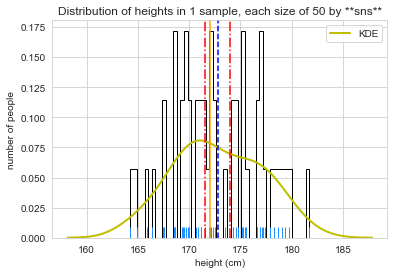

In [304]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
ax=sns.distplot(sample_50, bins=50, rug=True, 
             rug_kws={"color": "dodgerblue"},
             kde_kws={"color": "y", "lw": 2, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1, "color": "k"})
plt.xlabel('height (cm)')
plt.ylabel('number of people')
plt.title('Distribution of heights in 1 sample, each size of 50 by **sns**')
plt.axvline(mean_50, linestyle='--', color='blue')
plt.axvline(172, color='orange')
plt.axvline(lower_95_t, color='r', linestyle='-.')
plt.axvline(upper_95_t, color='r', linestyle='-.')
plt.show()

This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.

## 4. Learning outcomes

Having completed this project notebook, you now have hands-on experience:
* sampling and calculating probabilities from a normal distribution
* identifying the correct way to estimate the standard deviation of a population (the population parameter) from a sample
* with sampling distribution and now know how the Central Limit Theorem applies
* with how to calculate critical values and confidence intervals

NOTE: multivariate_normal

Text(0.5, 1.0, 'pdf')

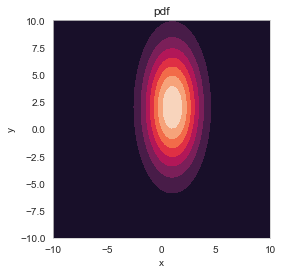

In [259]:
from scipy.stats import multivariate_normal
x,y = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
pos = np.dstack((x,y))
mean = np.array([1, 2])
cov  = np.array([[3,0],[0,15]])
rv = multivariate_normal(mean,cov)
z = rv.pdf(pos)
fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')
ax.contourf(x,y,z)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('pdf')

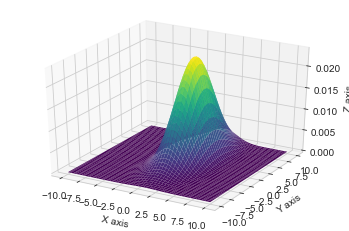

In [260]:
from mpl_toolkits.mplot3d import Axes3D
# Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X 
pos[:, :, 1] = Y
# Create a frozen RV object
mean = np.array([1, 2])
cov  = np.array([[3,0],[0,15]])
rv = multivariate_normal(mean,cov)
# Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()